# In class exercises for 10252021 (Filtering)

## First import data from eeg_data00.npz

In [2]:
# first import the modules that you'll need. 
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# import our sinc filter implementation function...
import my_brick_filt as mbf

## Just like in the first FFT tutorial load eeg_data00.npz so that we have an EEG data set to play with
* you should find that it has three arrays: data, tx, and sr (with 'data' a #trials x # timepoints array containing the EEG data, the time of each data acquisition in tx, and the sample rate stored as sr).  

In [11]:
# load the data...
eeg = np.load('eeg_data00.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 960 trials and 876 timepoints per trial sampled
# at 250Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']
# now you can just write data instead of eeg['data'] (and can for tx and sr as well...)

Shape of the big eeg data set:  (960, 876)
Sample rate:  250


## Like last week: extract the data from time 0 until time 2000
* hint: you can use boolean indexing by selecting the columns from the 'data' matrix that meet: (tx>=0)  & (tx<2000)
* while you're at it, go ahead and grab the timepoints corresponding to that interval as well

In [17]:
seg_data = data[:,(tx>=0)  & (tx<2000)]
seg_time = tx[(tx>=0) & (tx<2000)]

## Then FFT each trial and take a look at the average power across frequencies
* FFT each trial 
* Then compute the amplitude on each trial
* Then compute the average amplitude across all trials
* be mindful of the axis that you are FFTing over...trials down the rows, time across the columns, and we want to FFT over time! 

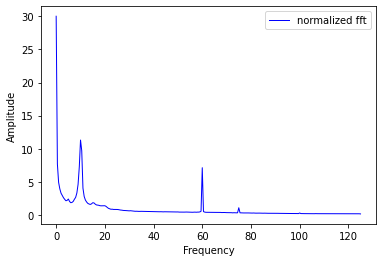

In [19]:
r, c = seg_data.shape

sp = np.fft.rfft(seg_data, axis = 1)                   # axis = 1 compute FFT over time
# axis = 0 would compute FFT over all the trials 

# compute amplitude
amp = (np.abs(sp) / c) * 2

mean_amp = np.mean(amp, axis = 0)

# get freq axis
freq = np.fft.rfftfreq(c, 1/sr)   # Sample spacing is 2nd arg
plt.plot(freq, mean_amp, 'b', linewidth=1)          # plot amplitude (power = np.absolute(sp)**2)

plt.legend(['normalized fft'], loc='best', fancybox=1)  
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## Notice that there are two prominent features in the freq domain representation. Make a lp filter that gets rid of power > 20Hz (you'll know if it worked if you get rid of the spike at 60Hz)
* Because our apply_filter function isn't optimized to work on matrices (we could do that, but haven't) you will need to loop and apply filter to each trial
* bonus: make the apply_filt function matrisized! pay attention to the dimension of the data you are passing into the fft function - you want to fft across time!

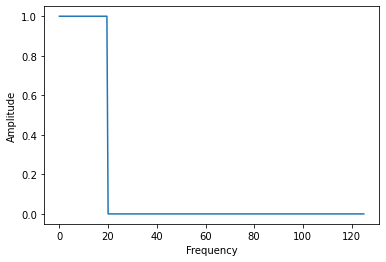

In [9]:
lp = 20
lp_filt = mbf.define_filt(fx=freq, filt_freq=lp, type_filt='lp')
plt.plot(freq, lp_filt)

plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.show()

## Then FFT it again to see if you got rid of the hf components of the signal

## Now design a band pass filter that gets rid of everything outside of the 6-14Hz range (where that big bump is...)
* To design a band pass filter, make a lp filter, then make a hp filter
* Then combine the two filters (multiply them - element by element - in the frequency domain) 
* Then call the apply_filt function
* Then you should be left with only those frequencies that pass the lp and the hp filters (i.e. a band pass filter)!

## Then FFT and look at filtered signal in the time and frequency domains (time domain on one plot, and freq on the other)

## You can also make a band-stop filter using a similar logic
* Instead of multiplying the FFTed lp and the hp filters, you can add them together
* Use this to selectively get rid of the 60Hz line noise in the data by generated a band-stop filter over 50-70Hz

## Then FFT and look at filtered signal in the frequency domain

# BONUS: Read the end of the tutorial and figure out to do this all more gracefully using blackman windowed filters... 